<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Install the required libraries we need for the lab.


In [11]:

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install piplite
!pip install scipy
!pip install statsmodels

  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/44.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.7 MB 487.6 kB/s eta 0:01:32
   ---------------------------------------- 0.2/44.7 MB 1.8 MB/s eta 0:00:26
   ---------------------------------------- 0.5/44.7 MB 3.1 MB/s eta 0:00:15
    --------------------------------------- 0.6/44.7 MB 3.6 MB/s eta 0:00:13
    --------------------------------------- 0.8/44.7 MB 3.6 MB/s eta 0:00:13
    --------------------------------------- 1.0/44.7 MB 3.7 MB/s eta 0:00:12
   - -------------------------------------- 1.2/44.7 MB 3.9 MB/s eta 0:00:12
   - -------------------------------------- 1.4/44.7 MB 4.0 MB/s eta 0:00:11
   - -------------------------------------- 1.9/44.7 MB 4.6 MB/s eta 0:00:10
   -- ------------------------------------- 2.4/44.7 MB 5.2 MB/s eta 0:00:09
   -- -----------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\JOYTSENG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2

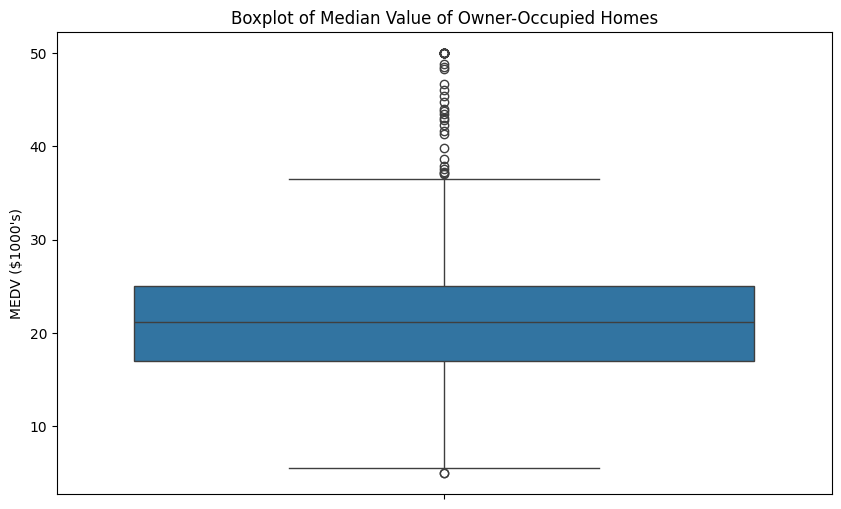

In [5]:
# Task 2-1: Boxplot for "Median value of owner-occupied homes"
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('MEDV ($1000\'s)')
pyplot.show()

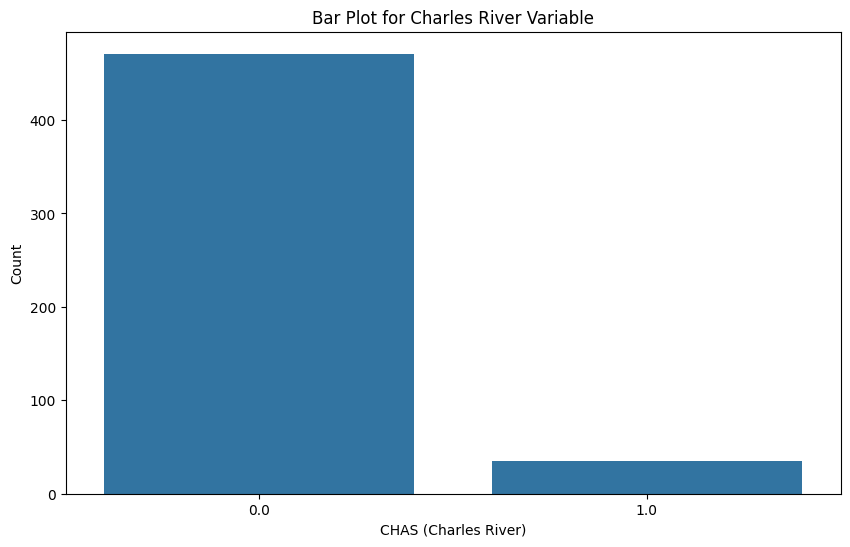

In [13]:
# Task 2-2: Bar plot for the Charles River variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot for Charles River Variable')
pyplot.xlabel('CHAS (Charles River)')
pyplot.ylabel('Count')
pyplot.show()

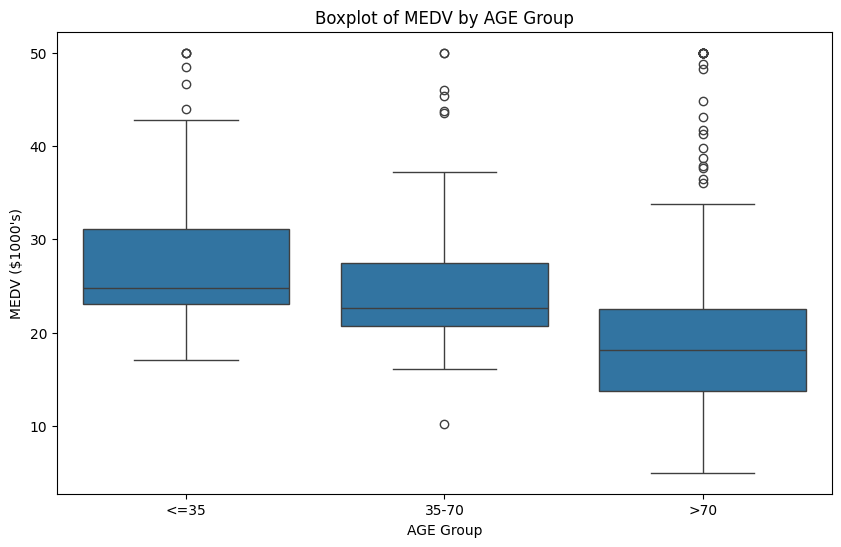

In [12]:
# Task 2-3: Boxplot for MEDV vs AGE variable (discretized)
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.xlabel('AGE Group')
pyplot.ylabel('MEDV ($1000\'s)')
pyplot.show()

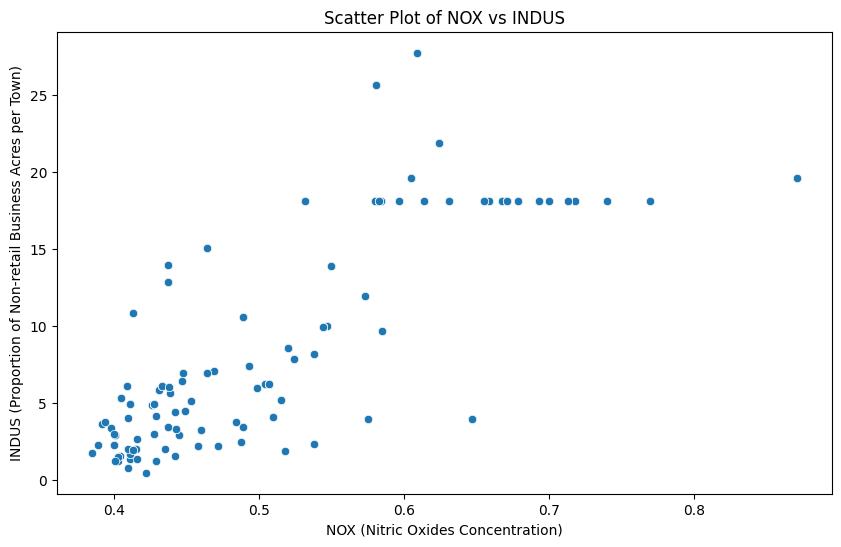

In [8]:
# Task 2-4: Scatter plot for NOX and INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('NOX (Nitric Oxides Concentration)')
pyplot.ylabel('INDUS (Proportion of Non-retail Business Acres per Town)')
pyplot.show()

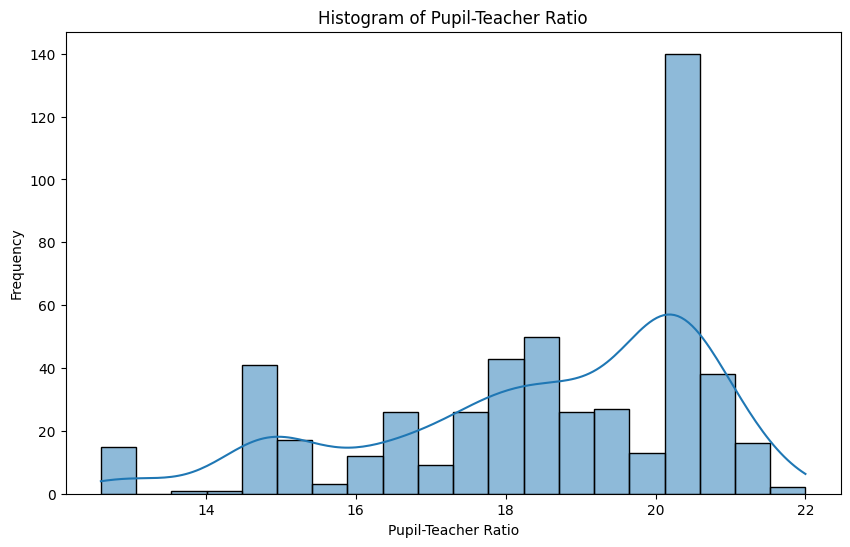

In [7]:

# Task 2-5: Histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Task 3

In [20]:
# Question 1: T-test for independent samples
# Hypothesis:
# H0: There is no significant difference in the median value of houses bounded by the Charles river.
# H1: There is a significant difference in the median value of houses bounded by the Charles river.
alpha = 0.05
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)

print("T-test for independent samples")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles river.")



T-test for independent samples
T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.


In [23]:
# Question 2: ANOVA
# Hypothesis:
# H0: There is no difference in median values of houses (MEDV) across age groups.
# H1: There is a difference in median values of houses (MEDV) across age groups.
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA")
print(anova_table)
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis: There is a difference in median values of houses (MEDV) across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no difference in median values of houses (MEDV) across age groups.")




ANOVA
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a difference in median values of houses (MEDV) across age groups.


C:\Users\JOYTSENG\AppData\Local\Temp\ipykernel_24540\3843509300.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


In [24]:
# Question 3: Pearson Correlation
# Hypothesis:
# H0: There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) per town.
# H1: There is a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) per town.
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\nPearson Correlation")
print(f"Correlation coefficient: {corr}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")




Pearson Correlation
Correlation coefficient: 0.763651446920915, P-value: 7.913361061241532e-98
Reject the null hypothesis: There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [25]:
# Question 4: Regression analysis
# Hypothesis:
# H0: There is no impact of the weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
# H1: There is an impact of the weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("\nRegression Analysis")
print(model.summary())
if model.pvalues[1] < alpha:
    print("Reject the null hypothesis: There is an impact of the weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: There is no impact of the weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")


Regression Analysis
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        05:23:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.81

C:\Users\JOYTSENG\AppData\Local\Temp\ipykernel_24540\1454459646.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < alpha:
